# Price Prediction using Regression Syed Muhammad Zain

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

#### **Task 1: Import Dataset and create a copy of that dataset**

In [3]:
#write code here
data = pd.read_csv('data1.csv')
df = data.copy()

#### **Task 2: Display first five rows** 

In [4]:
#write code here
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 3: Drop 'unnamed: 0' column**

In [5]:
#write code here
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


#### **Task 4: Check the number of rows and columns**

In [7]:
#write code here
df.shape

(215909, 9)

#### **Task 5: Check data types of all columns**

In [8]:
#write code here
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

#### **Task 6: Check summary statistics**

In [9]:
#write code here
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


#### **Task 7: Check summary statistics of all columns, including object dataypes**

In [10]:
df.describe(include="all")

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Question: Explain the summary statistics for the above data set**

**Answer:For the price portion it is clearly visible that 56.72 this mean price is needed for
predicting price reduction.We can also observe that the most popular origin and destination is MADRID**
**The most popular starting and ending date was 06-02-2019 and the most frequent train type is AWE**
**The most popular train class is Turista and most popular fare is promo**

#### **Task 8: Check null values in dataset**

In [11]:
#write code here
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

#### **Task 9: Fill the Null values in the 'price' column.**<br>


In [12]:
#write code here
avg_price=df['price'].mean(axis=0)
df['price'].replace(np.nan,avg_price,inplace=True)#gives better results with average then with 0

#### **Task 10: Drop the rows containing Null values in the attributes train_class and fare**

In [13]:
#write code here
df.dropna(subset=['train_class'],axis=0,inplace=True)
df.dropna(subset=['fare'],axis=0,inplace=True)#can be done in one line of code

#### **Task 11: Drop 'insert_date'**

In [14]:
#write code here
df=df.drop(['insert_date'],axis=1)

**Check null values again in dataset**

In [15]:
#write code here
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

#### **Task 12: Plot number of people boarding from different stations**


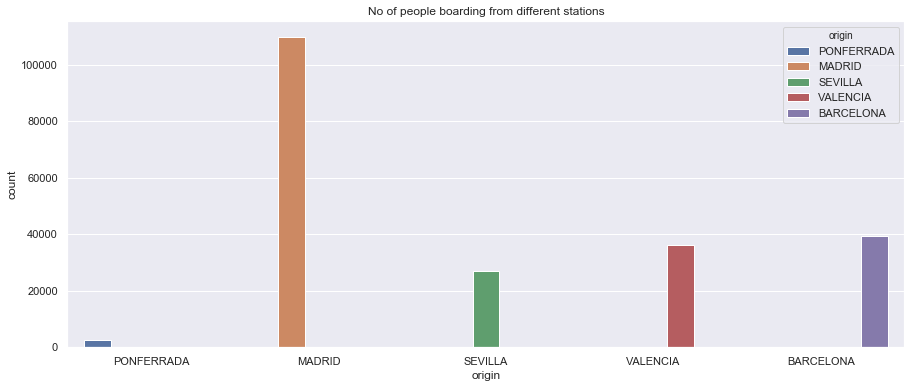

In [16]:
#write code here
plt.figure(figsize=(15,6))
plt.title('No of people boarding from different stations')
sns.countplot(x='origin',hue='origin',data=df)

**Question: What insights do you get from the above plot?**

**Answer:Most of the people have boarded from Madrid station as is indicated by the graph above.PONFERRADA is the station that has the least number of people boarding through it.Barcelona,Valencia and Sevilla are the 2nd 3rd,4th in terms of people.**

#### **Task 13: Plot number of people for the destination stations**


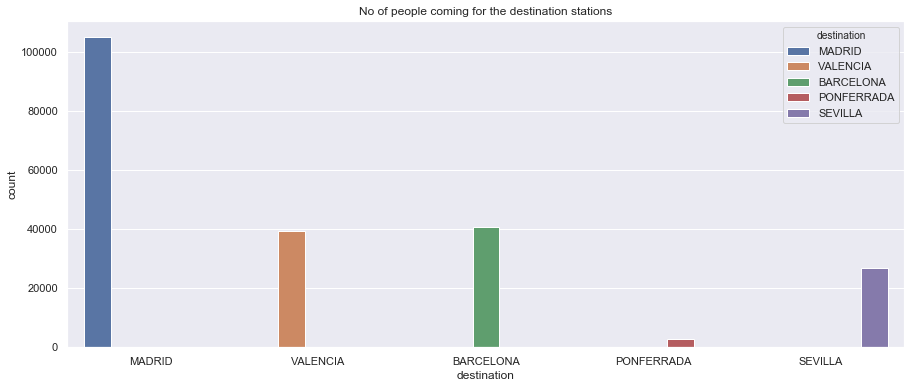

In [17]:
#write code here
plt.figure(figsize=(15,6))
plt.title("No of people coming for the destination stations")
sns.countplot(x='destination',hue='destination',data=df)

**Question: What insights do you get from the above graph?**

**Answer:The Destination graph shows a similar pattern as MADRID has the most number of people arriving at its station and PONFERRADA has the least.Barcelona,Valencia,Sevilla are the 2nd,3rd and 4th in terms of people. We can see that a strong correlation between no of people boarding and arriving at different destinations.**

#### **Task 14: Plot different types of train that runs in Spain**


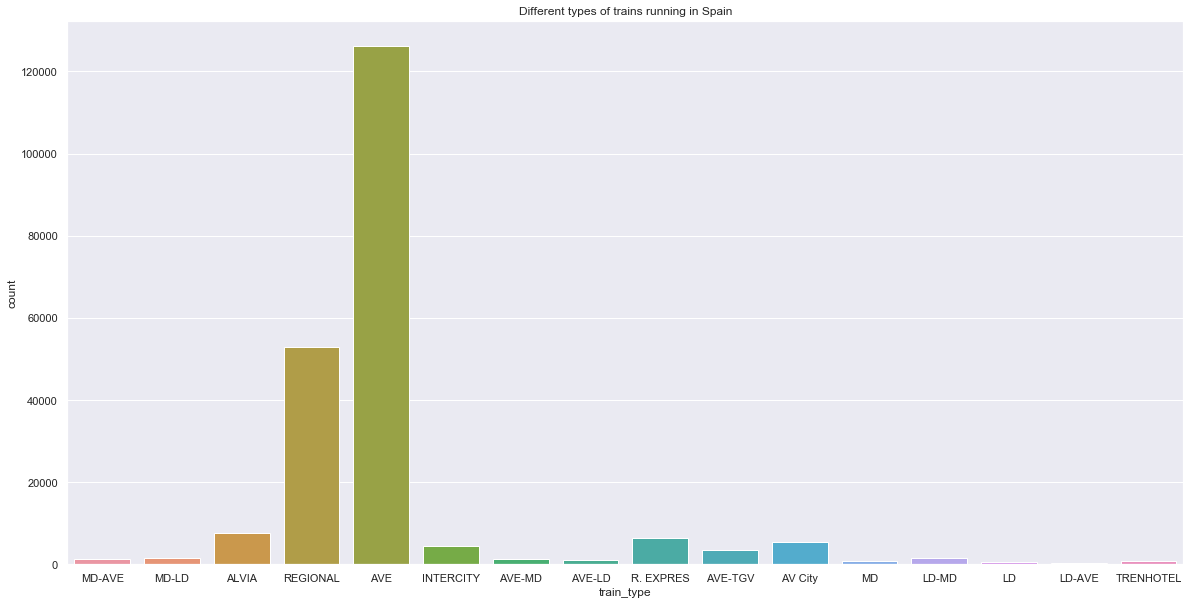

In [18]:
#write code here
plt.figure(figsize=(20,10))
plt.title("Different types of trains running in Spain")
sns.countplot(x='train_type',data=df)

**Question: Which train runs the maximum in number as compared to other train types?**

**Answer:As is indicated by the countplot the train that runs the maximum number of times as compared to the others is the AVE type train.** 


#### **Task 15: Plot number of trains of different class**


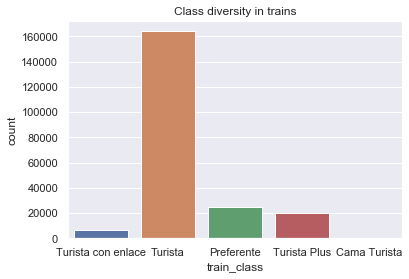

In [19]:
#write code here
plt.title("Class diversity in trains")
sns.countplot(x='train_class',data=df)

**Question: Which the most common train class for traveling among people in general?**

**Answer:Most common class is Turista for travelling purposes it is very large when compared to the other categories.** 


#### **Task 16: Plot number of tickets bought from each category**


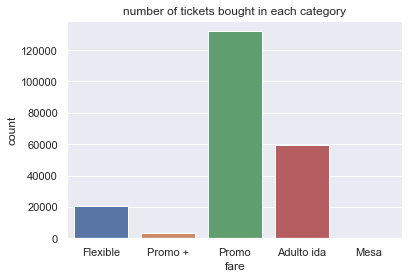

In [20]:
#write code here
plt.title("number of tickets bought in each category")
sns.countplot(x='fare',data=df)

**Question: Which the most common tickets are bought?**

**Answer:The most common tickets are the promo fare tickets and their is large when compared to the other tickets that are bought this may mean that the fare associated with these tickets is the reason for the increased value** 

#### **Task 17: Plot distribution of the ticket prices**

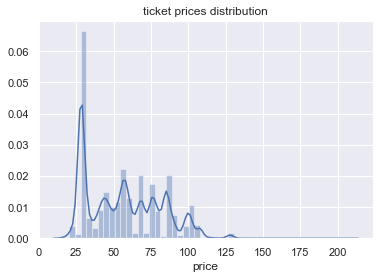

In [24]:
#write code here
plt.title('ticket prices distribution')
sns.distplot(df['price'])

**Question: What readings can you get from the above plot?**

**Answer:The distribution of prices is a little bit uneven with the value at 30 dominating the distribution**          

###### **Task 18: Show train_class vs price through boxplot**

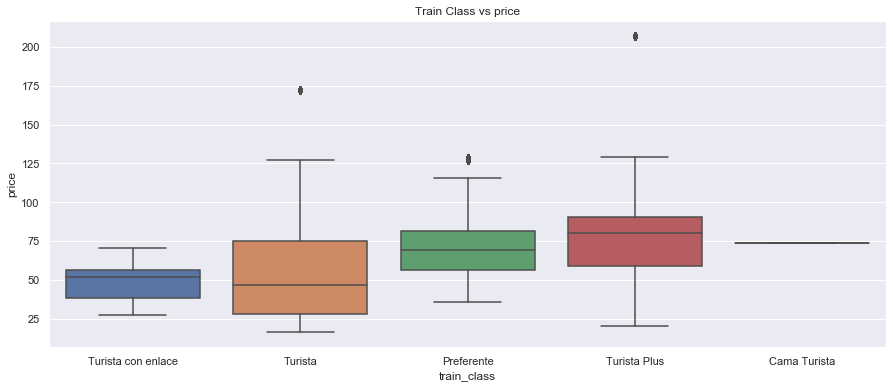

In [62]:
#write code here
plt.figure(figsize=(15,6))
plt.title("Train Class vs price")
sns.boxplot(x='train_class',y='price',data=df)

**Question: What pricing trends can you find out by looking at the plot above?**

**Answer:It is clearly visible that the pricing range is highest for Turista Plus lowest overall for Turista.Turista class has the most diversity in terms of prices while turista con enlance shows least diversity in terms of price.**

#### **Task 19: Show train_type vs price through boxplot**


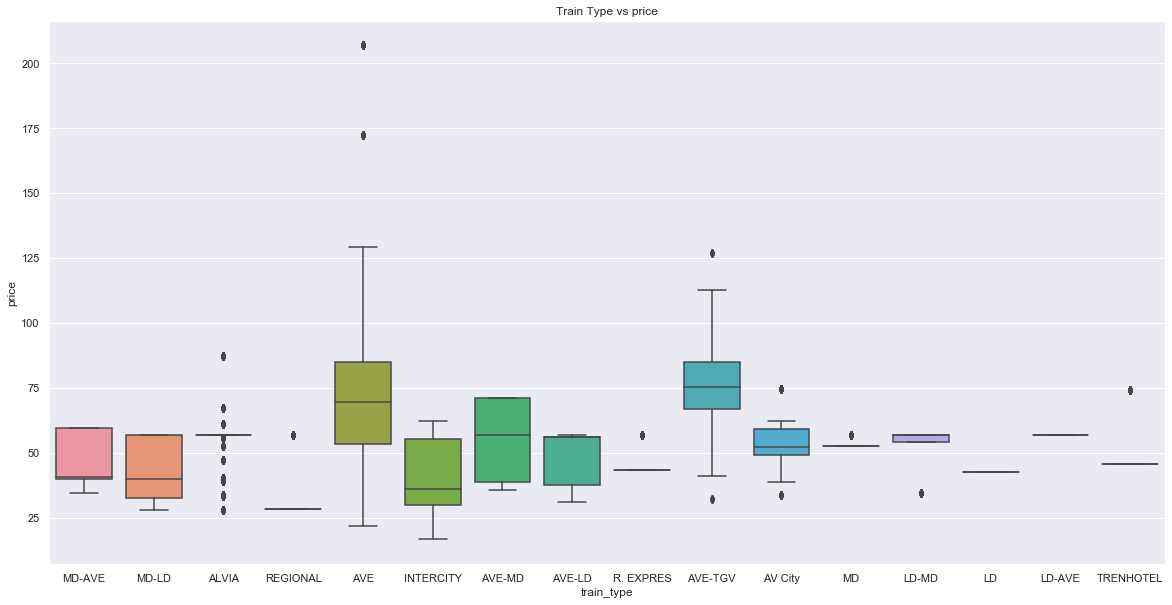

In [63]:
#write code here
plt.figure(figsize=(20,10))
plt.title("Train Type vs price")
sns.boxplot(x='train_type',y='price',data=df)

**Question: Which type of trains cost more as compared to others?**

**Answer:In general AVE and AVE-TGV cost the most in terms of pricing.** 



## Feature Engineering


In [64]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [65]:
#write code here
import datetime

In [66]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'
def fun(a,b):
    diff = datetime.datetime.strptime(b, datetimeFormat)- datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)                  
    

In [67]:
df['travel_time_in_hrs'] = df.apply(lambda x:fun(x['start_date'],x['end_date']),axis=1) 

#### **Task 20: Remove redundant features**


**You need to remove features that are giving the related values as  'travel_time_in_hrs'**<br>
*Hint: Look for date related columns*

In [68]:
#write code here
df=df.drop(['start_date'],axis=1)# could have done this in single line
df=df.drop(['end_date'],axis=1)
df.head()           

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## **Travelling from MADRID to SEVILLA**

#### Task 21: Findout people travelling from MADRID to SEVILLA

In [69]:
#write code here
df1 = df[(df['origin']=='MADRID') & (df['destination']=='SEVILLA')]

#### Task 22: Make a plot for finding out travelling hours for each train type

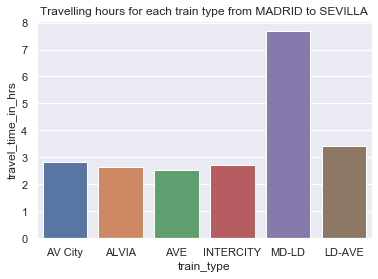

In [70]:
#write code here
plt.title("Travelling hours for each train type from MADRID to SEVILLA")
sns.barplot(x='train_type',y='travel_time_in_hrs',data=df1)

#### **Task 23: Show train_type vs price through boxplot**


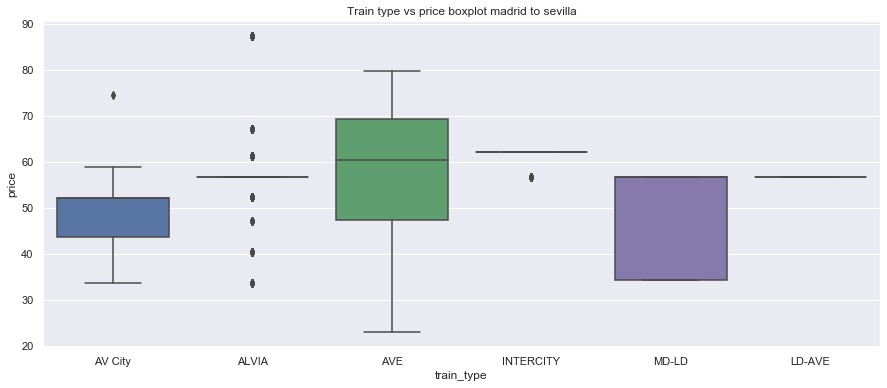

In [71]:
#write code here
plt.figure(figsize=(15,6))
plt.title("Train type vs price boxplot madrid to sevilla")
sns.boxplot(x='train_type',y='price',data=df1)

## **Travelling from MADRID to BARCELONA**


#### Task 24: Findout people travelling from MADRID to BARCELONA

In [72]:
#write code here
df2 = df[(df['origin']=='MADRID') & (df['destination']=='BARCELONA')]

#### Task 25: Make a plot for finding out travelling hours for each train type

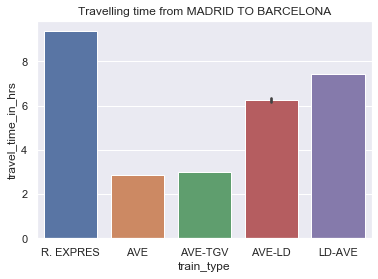

In [73]:
#write code here
plt.title('Travelling time from MADRID TO BARCELONA')
sns.barplot(x='train_type',y='travel_time_in_hrs',data=df2)

#### **Task 26: Show train_type vs price through boxplot**

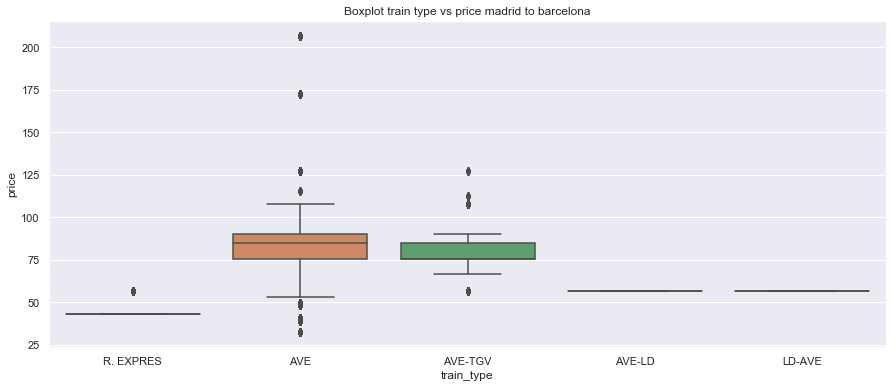

In [74]:
#write code here
plt.figure(figsize=(15,6))
plt.title("Boxplot train type vs price madrid to barcelona")
sns.boxplot(x='train_type',y='price',data=df2)

## **Travelling from MADRID to VALENCIA**

#### Task 27: Findout people travelling from MADRID to VALENCIA

In [75]:
#write code here
df3 = df[(df['origin']=='MADRID') & (df['destination']=='VALENCIA')]

#### Task 28: Make a plot for finding out travelling hours for each train type

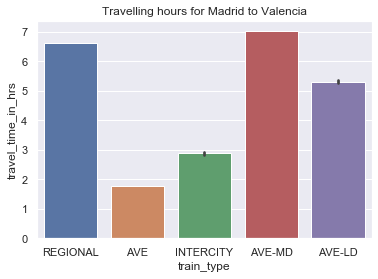

In [76]:
#write code here
plt.title("Travelling hours for Madrid to Valencia")
sns.barplot(x='train_type',y='travel_time_in_hrs',data=df3)

#### **Task 29: Show train_type vs price through boxplot**

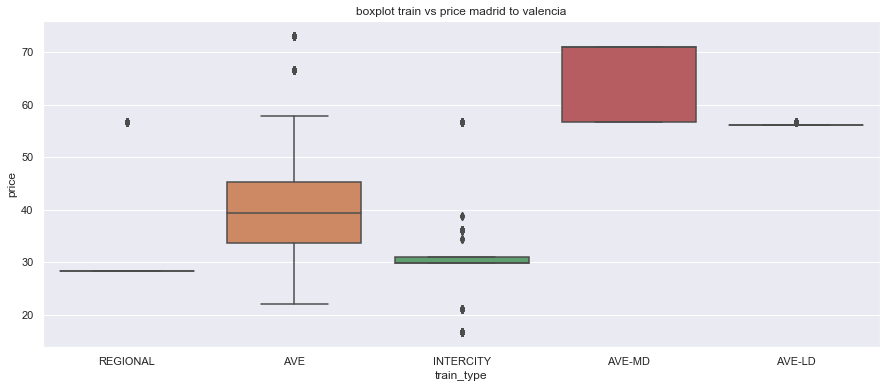

In [77]:
#write code here
plt.figure(figsize=(15,6))
plt.title("boxplot train vs price madrid to valencia")
sns.boxplot(x='train_type',y='price',data=df3)

## **Travelling from MADRID to PONFERRADA**

#### Task 30: Findout people travelling from MADRID to PONFERRADA

In [78]:
#write code here
df4 = df[(df['origin']=='MADRID') & (df['destination']=='PONFERRADA')]

#### Task 31: Make a plot for finding out travelling hours for each train type

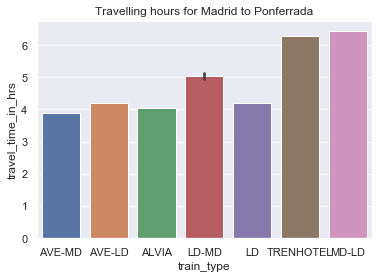

In [79]:
#write code here
plt.title("Travelling hours for Madrid to Ponferrada")
sns.barplot(x='train_type',y='travel_time_in_hrs',data=df4)

#### **Task 32: Show train_type vs price through boxplot**

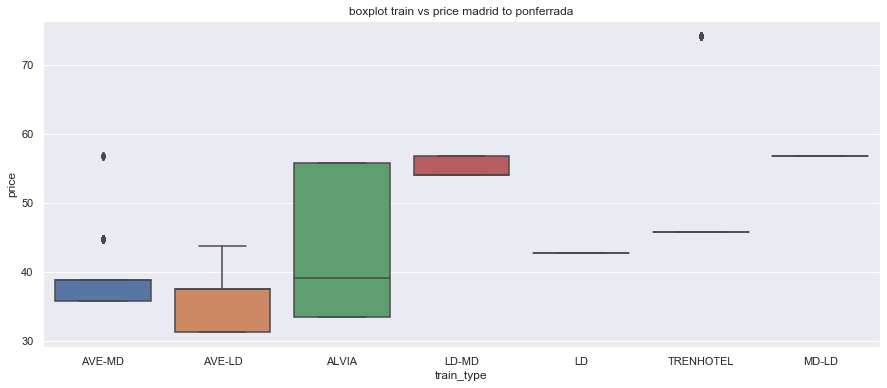

In [80]:
#write code here
plt.figure(figsize=(15,6))
plt.title("boxplot train vs price madrid to ponferrada")
sns.boxplot(x='train_type',y='price',data=df4)

# Applying Linear  Regression

#### Task 33: Import LabelEncoder library from sklearn 

In [81]:
#write code here
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [82]:
lab_en = LabelEncoder()
df.iloc[:,1] = lab_en.fit_transform(df.iloc[:,1])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])
df.iloc[:,6] = lab_en.fit_transform(df.iloc[:,6])

In [83]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs
0,0,2,1,11,59.50,4,1,4.700000
1,1,2,1,11,34.65,4,4,5.800000
2,2,2,1,12,39.95,4,4,5.916667
3,3,2,1,11,40.60,4,4,4.983333
4,4,2,1,0,27.90,2,3,4.133333


#### Task 34: Separate the dependant and independant variables

In [84]:
#write code here
X = df.drop(['price'],axis=1)
Y = df[['price']]

#### Task 35: Import test_train_split from sklearn

In [85]:
#write code here
from sklearn.model_selection import train_test_split

#### Task 36:**Split the data into training and test set**

In [86]:
#write code here
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=25,shuffle=True)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(150686, 7) (150686, 1)
(64580, 7) (64580, 1)


#### Task 37: Import LinearRegression library from sklearn

In [87]:
#write code here
from sklearn.linear_model import LinearRegression

#### Task 38: Make an object of LinearRegression( ) and train it using the training data set

In [88]:
#write code here
lr = LinearRegression()

In [89]:
#write code here
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Task 39: Find out the predictions using test data set.

In [90]:
#write code here
lr_predict = lr.predict(X_test)

#### Task 40: Find out the predictions using training data set.

In [91]:
#write code here
lr_predict_train = lr.predict(X_train)

#### Task 41: Import r2_score library form sklearn

In [92]:
#write code here
from sklearn.metrics import r2_score

#### Task 42: Find out the R2 Score for test data and print it.

In [93]:
#write code here
lr_r2_test= r2_score(Y_test,lr_predict)

#### Task 43: Find out the R2 Score for training data and print it.

In [94]:
lr_r2_train = r2_score(Y_train,lr_predict_train)

Comaparing training and testing R2 scores

In [95]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is: ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.7256800103046104
R2 score for Linear Regression Testing Data is:  0.7309207961509147


# Applying Polynomial Regression

#### Task 44: Import PolynomialFeatures from sklearn

In [96]:
#write code here
from sklearn.preprocessing import PolynomialFeatures

#### Task 45: Make and object of default Polynomial Features

In [97]:
#write code here
poly_reg = PolynomialFeatures(degree=2)

#### Task 46: Transform the features to higher degree features.

In [98]:
#write code here
X_train_poly,X_test_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)

#### Task 47: Fit the transformed features to Linear Regression

In [99]:
#write code here
poly_model = LinearRegression()
poly_model.fit(X_train_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Task 48: Find the predictions on the data set

In [100]:
#write code here
y_train_predicted,y_test_predict = poly_model.predict(X_train_poly),poly_model.predict(X_test_poly)

#### Task 49: Evaluate R2 score for training data set

In [101]:
#evaluating the model on training dataset
#write code here
r2_train = r2_score(Y_train,y_train_predicted)

#### Task 50: Evaluate R2 score for test data set

In [102]:
# evaluating the model on test dataset
#write code here
r2_test = r2_score(Y_test,y_test_predict)

Comaparing training and testing R2 scores

In [103]:
#write code here
print ('The r2 score for training set is: ',r2_train)
print ('The r2 score for testing set is: ',r2_test)

The r2 score for training set is:  0.8226205944904242
The r2 score for testing set is:  0.8230804441846298


#### Task 51: Select the best model

**Question: Which model gives the best result for price prediction? Find out the complexity using R2 score and give your answer.**<br>
*Hint: Use for loop for finding the best degree and model complexity for polynomial regression model*

In [104]:
#write code here
r2_train=[]
r2_test=[]
for i in range(1,6):
    poly_reg = PolynomialFeatures(i)
    
    X_tr_poly,X_tst_poly = poly_reg.fit_transform(X_train),poly_reg.fit_transform(X_test)
    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)
   
    y_tr_predicted,y_tst_predict = poly.predict(X_tr_poly),poly.predict(X_tst_poly)
    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))
    
print ('R2 Train', r2_train)
print ('R2 Test', r2_test)

R2 Train [0.7256800103046104, 0.8226205944904242, 0.8132930118874361, 0.720365978679888, 0.4514246975432582]
R2 Test [0.7309207961509151, 0.8230804441846298, 0.8146633647276591, 0.7225459141918923, 0.4594002002451292]


#### Plotting the model

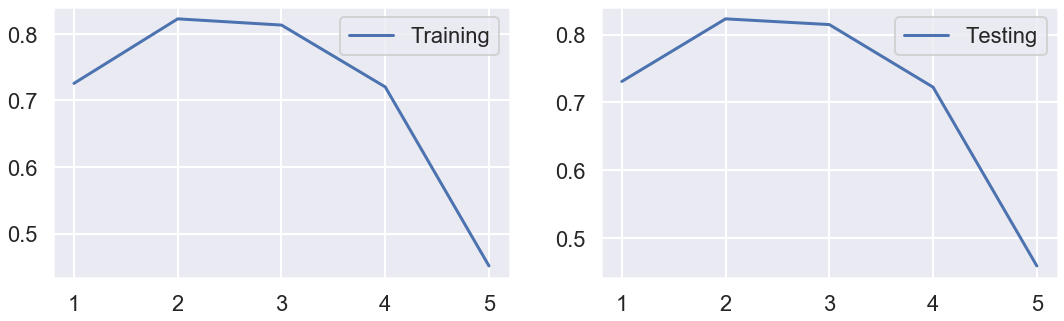

In [105]:
plt.figure(figsize=(18,5))#sir graph correct dont know exact difference see sir graph.
sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training');
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing');

**Answer**

In [ ]:
#The best model is polynomial features degree 2 as it has the most R2 score.